# 解决多分类问题

## OVR One vs Rest/one vs All
每次选定一个分类 然后把其他所有分类都当作另外一个分类 最后循环N个类别:
![ovr](img/ovr.png)
![ovr2](img/ovr2.png)

## OVO one vs one
每次只判断2个类别
然后对所有的分类 遍历完所有的分类1-分类2的分类训练
![ovo](img/ovo.png)

In [1]:
# OVO更加耗时 但是它更加准确 因为它并不会混淆其他的分类 每次都选择最对的分类.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, :2]
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# 3分类任务  只取了前2个特征来方便可视化
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# multi_class = ovr  sklearn默认支持多分类 且采用ovr
log_reg.score(X_test, y_test)

0.6578947368421053

In [14]:
def plot_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    return

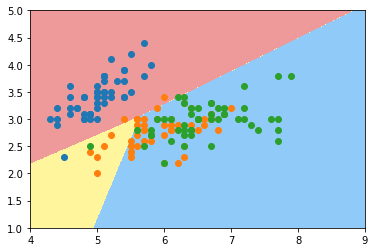

In [15]:
plot_decision_boundry(log_reg, [4, 9, 1, 5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])


In [16]:
# 因为我们只使用两个特征 导致分数不高.
# 试试OVO

In [17]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.7894736842105263

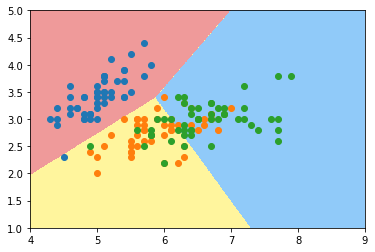

In [18]:
plot_decision_boundry(log_reg2, [4, 9, 1, 5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [19]:
# 使用所有特征  也就不能可视化了
X = iris.data
y = iris.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [21]:
log_reg3 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg3.fit(X_train, y_train)
log_reg3.score(X_test, y_test)

1.0

In [22]:
log_reg4 = LogisticRegression()
log_reg4.fit(X_train, y_train)
log_reg4.score(X_test, y_test)

0.9473684210526315

## 使用OVO更加准确 也更加耗时

In [23]:
# 使用手写数字
digits = datasets.load_digits()

In [24]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
X = digits.data
y = digits.target

In [26]:
X.shape

(1797, 64)

In [27]:
y.shape

(1797,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [36]:
%%time
log_reg4 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg4.fit(X_train, y_train)
log_reg4.score(X_test, y_test)

Wall time: 925 ms


In [35]:
%%time
log_reg5 = LogisticRegression()
log_reg5.fit(X_train, y_train)
log_reg5.score(X_test, y_test)

Wall time: 140 ms


## 手动支持任意的二分类算法来支持OVO OVR

In [37]:
from sklearn.multiclass import OneVsRestClassifier

In [38]:
log_reg = LogisticRegression()
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9555555555555556

In [39]:
from sklearn.multiclass import OneVsOneClassifier
log_reg = LogisticRegression()
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

0.98